In [118]:
import pandas as pd
import numpy as np

In [290]:
arquivo = 'enem_2023.json'
data_enem = pd.read_json(arquivo)
print(data_enem.head(5))

   Linguagens  Ciências humanas  Ciências da natureza  Matemática     Redação  \
0  585.669300        686.512178            390.482473  452.281333  546.371706   
1  359.384608        642.084134                   NaN  412.205207  741.825256   
2  622.732384        495.510719            443.183580  669.683401  684.515750   
3  350.164605        602.041588            413.979810  676.608952  671.237114   
4  384.093657        489.249140            609.758123  520.426698  744.375048   

     Sexo  
0   Homem  
1  Mulher  
2   Homem  
3   Homem  
4   Homem  


In [291]:
data_enem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [179]:
data_enem_describe = data_enem.describe()
print('DESCRIBE: \n ', data_enem_describe)


DESCRIBE: 
         Linguagens  Ciências humanas  Ciências da natureza  Matemática  \
count  897.000000        936.000000            824.000000  924.000000   
mean   514.524809        527.042281            499.315583  535.965660   
std     84.009313         77.811519             78.760404   86.648100   
min    287.000000        289.900000            314.400000  319.800000   
25%    458.360558        475.424546            444.709076  479.172971   
50%    515.045250        524.519920            500.479263  533.247767   
75%    571.635876        581.401952            548.751678  592.912963   
max    804.456317        763.919695            802.004568  807.877902   

           Redação  
count   860.000000  
mean    637.783532  
std     115.339972  
min     270.839965  
25%     556.468366  
50%     635.273973  
75%     715.989868  
max    1000.000000  


1- Qual das disciplinas tem a maior amplitude de nota?

In [180]:
amplitude = data_enem_describe.loc['max'] - data_enem_describe.loc['min']
### Pegando a disciplina com maior numero de amplitude
print('A matéria com maior amplitude é:', amplitude[amplitude.max() == amplitude])


A matéria com maior amplitude é: Redação    729.160035
dtype: float64


2- Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [181]:
data_enem.isna().sum()

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

In [292]:
### Removendo os valores nulos
## Salvando em uma variável para usar na questão 10
data_enem_com_nulos = data_enem.copy()
data_enem = data_enem.dropna()
data_enem.isna().sum()

Linguagens              0
Ciências humanas        0
Ciências da natureza    0
Matemática              0
Redação                 0
Sexo                    0
dtype: int64

In [183]:
data_enem.info()
print('Quntidade de dados: ', len(data_enem.index))

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 998
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            548 non-null    float64
 1   Ciências humanas      548 non-null    float64
 2   Ciências da natureza  548 non-null    float64
 3   Matemática            548 non-null    float64
 4   Redação               548 non-null    float64
 5   Sexo                  548 non-null    object 
dtypes: float64(5), object(1)
memory usage: 30.0+ KB
Quntidade de dados:  548


In [184]:
data_enem.head(5)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem


In [185]:
### Média das notas
data_enem[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].mean()

Linguagens              517.467162
Ciências humanas        528.351454
Ciências da natureza    502.142101
Matemática              537.172480
Redação                 641.193123
dtype: float64

In [186]:
### Mediana das notas
data_enem[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].median()

Linguagens              517.128831
Ciências humanas        528.503263
Ciências da natureza    502.935209
Matemática              532.961486
Redação                 639.602691
dtype: float64

3- Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado: 

a. Redação - 2 

b. Matemática e suas Tecnologias - 4 

c. Linguagens, Códigos e suas Tecnologias - 2 

d. Ciências Humanas e suas Tecnologias - 1 

e. Ciências da Natureza e suas Tecnologias - 1 

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [192]:
data_enem_MP = data_enem.copy()
red =  data_enem_MP['Redação'] * 2
mat =  data_enem_MP['Matemática'] * 4
ling =  data_enem_MP['Linguagens'] * 2
ch =  data_enem_MP['Ciências humanas'] * 1
cn =  data_enem_MP['Ciências da natureza'] * 1


In [194]:
data_enem_MP['media ponderada'] = (red + mat + ling + ch + cn)/10
data_enem_MP.head(5)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,media ponderada
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem,515.020199
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem,623.192417
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem,576.526064
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem,543.765146
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem,571.021214


In [198]:
data_enem_MP = data_enem_MP.sort_values(['media ponderada'], ascending=False).head(500)
print(data_enem_MP)

     Linguagens  Ciências humanas  Ciências da natureza  Matemática  \
25   604.825455        447.532353            523.041011  727.181224   
824  533.812379        611.760520            494.994598  807.877902   
702  551.398112        637.818208            451.624683  803.769938   
129  583.015454        434.261543            588.516699  687.621711   
60   498.394660        668.355060            457.371963  760.136151   
..          ...               ...                   ...         ...   
400  515.892318        398.431513            440.731835  522.484700   
160  539.397184        608.405447            314.400000  507.648230   
529  416.114140        438.110249            429.881954  462.605411   
386  537.838737        570.471430            584.935736  437.841844   
384  444.801027        517.393097            545.891188  457.624808   

        Redação            Sexo  media ponderada  
25   870.464077          Mulher       682.987732  
824  697.570213  Não idenficado       680.103

In [200]:
### Desvio padrão
desvio_padrao = data_enem_MP.iloc[:500, 6].std()
print('Desvio padrão: ', desvio_padrao)

Desvio padrão:  40.435866299464266


In [202]:
### Média
media = data_enem_MP.iloc[:500, 6].mean()
print('Média: ', media)

Média:  557.2896772018769


4- Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas,qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [212]:
data_enem_4 = data_enem.copy()

In [213]:
data_enem_4['media'] = (data_enem['Ciências da natureza'] + data_enem['Ciências humanas'] + data_enem['Linguagens'] + data_enem['Matemática'] + data_enem['Redação'])/5
data_enem_4.head(5)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,media
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem,532.263398
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem,583.125167
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem,542.806414
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem,549.580533
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem,547.819199


In [214]:
data_enem_4 = data_enem_4.sort_values(['media'], ascending=False).head(40)
data_enem_4

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,media
880,671.524266,590.780179,546.595272,571.607337,909.379934,Homem,657.977398
422,804.456317,505.521842,654.759618,534.368748,772.389790,Mulher,654.299263
948,681.993514,607.264955,629.802349,542.751190,794.691795,Não idenficado,651.300761
162,624.288291,555.722737,683.228347,591.233755,769.757995,Homem,644.846225
944,692.452396,536.593205,628.656897,526.336362,821.040693,Mulher,641.015911
889,600.029214,641.687541,502.881064,540.269675,916.023211,Mulher,640.178141
665,646.645962,707.207390,554.583425,424.236272,850.795898,Mulher,636.693789
617,604.613112,653.875230,692.838858,562.622265,663.012320,Mulher,635.392357
25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,634.608824
965,660.913894,613.882660,433.935910,580.908082,881.465882,Mulher,634.221286


In [216]:
### Media dos alunos que passaram
media = data_enem_4['media'].mean()
print('Média dos alunos que passaram: ', media)

Média dos alunos que passaram:  623.6039618416469


In [217]:
def variance(x):
    return np.sum((x - x.mean())**2)/len(x)

In [218]:
variancia = variance(data_enem_4['media'])
print('Variância: ', variancia)

Variância:  193.93831868051447


5- Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [227]:
quatil = data_enem.copy()
quatil.head(5)
quatil = quatil.sort_values(['Matemática', 'Linguagens'], ascending=True)
quatil

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
567,456.342856,616.367091,587.177451,319.800000,417.106303,Mulher
430,483.227062,367.087840,596.598957,319.800000,765.149125,Homem
521,541.042135,634.655425,486.854257,319.800000,440.636205,Mulher
199,569.053376,594.926788,638.614837,319.800000,833.386035,Homem
651,571.635876,424.514676,532.292177,319.800000,415.759955,Homem
...,...,...,...,...,...,...
476,402.462297,549.138401,529.270997,750.205360,658.313174,Homem
60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher
989,462.051713,512.986241,506.405210,787.771672,692.814673,Homem
702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem


In [232]:
## Fazendo a conta manualmente do quartil 3
n = len(quatil.index)
quartil_3 = int((3 * (n + 1)) / 4) ## Pegando so a parte inteira
valor_quartil_1_mat = quatil.iloc[quartil_3, 3]
valor_quartil_2_mat = quatil.iloc[quartil_3+1, 3]

print('Valores do quartil 3: ', valor_quartil_1_mat, valor_quartil_2_mat)

media_quartil = int((valor_quartil_1_mat + valor_quartil_2_mat) / 2)
print('Média do quartil 3: ', media_quartil)

Valores do quartil 3:  591.6397249571 592.3729088976
Média do quartil 3:  592


In [233]:
quatil.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,548.000000,548.000000,548.000000,548.000000,548.000000
mean,517.467162,528.351454,502.142101,537.172480,641.193123
std,82.113520,76.786787,78.419720,87.850751,115.578585
min,287.000000,289.900000,314.400000,319.800000,290.308608
25%,462.647968,475.858622,449.998135,477.018471,558.524958
50%,517.128831,528.503263,502.935209,532.961486,639.602691
75%,572.645407,584.115231,552.260535,591.335247,715.550093
max,804.456317,763.919695,802.004568,807.877902,931.305275


In [236]:
teto_quartil3_mat = quatil.describe().loc['75%', 'Matemática']
teto_quartil3_mat

591.335247441725

In [237]:
teto_quartil3_ling = quatil.describe().loc['75%', 'Linguagens']
teto_quartil3_ling

572.64540727285

6- Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique senão assimétricas?

In [238]:
### bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt

In [242]:
histograma = data_enem[['Redação', 'Linguagens']].copy()
histograma

,Redação,Linguagens
0,546.371706,585.669300
2,684.515750,622.732384
3,671.237114,350.164605
4,744.375048,384.093657
5,507.365147,616.043360
...,...,...
990,795.671459,510.183170
993,579.596477,460.925597
994,566.635561,502.990616
996,715.984249,457.755594


<Figure size 800x1000 with 0 Axes>

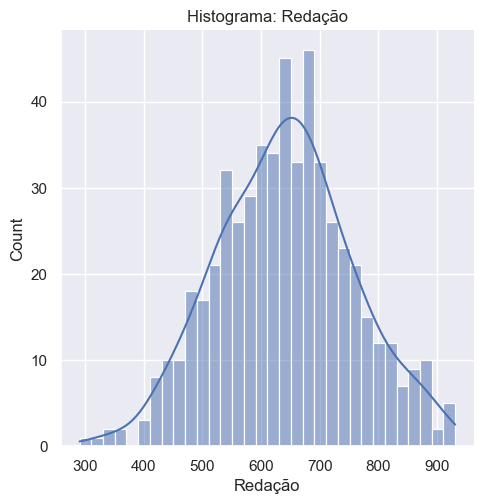

<Figure size 800x1000 with 0 Axes>

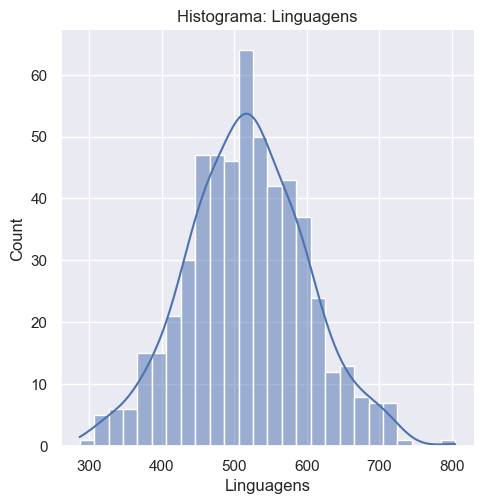

In [244]:
plt.rcParams['figure.figsize'] = [8, 10] ## Tamanho do gráfico de 8 por 10
sns.set_theme()
# create distplots
for column in histograma.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.displot(data = histograma , x = column, kde= True, binwidth=20)
    plt.title("Histograma: "+column)

Sim eles são simétricos.

7- Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? 

[plt.hist(dado,bins=_,range=[0,1000])]

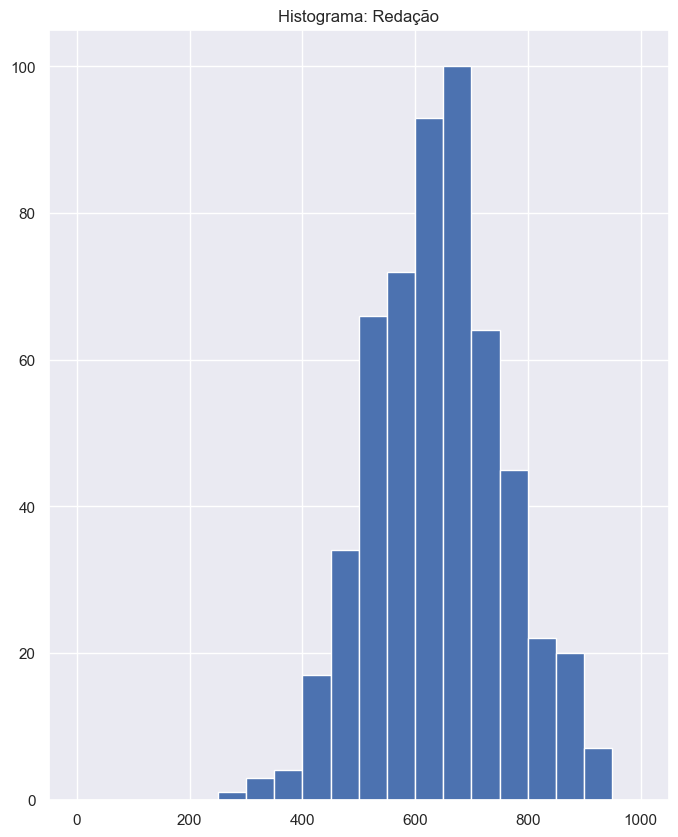

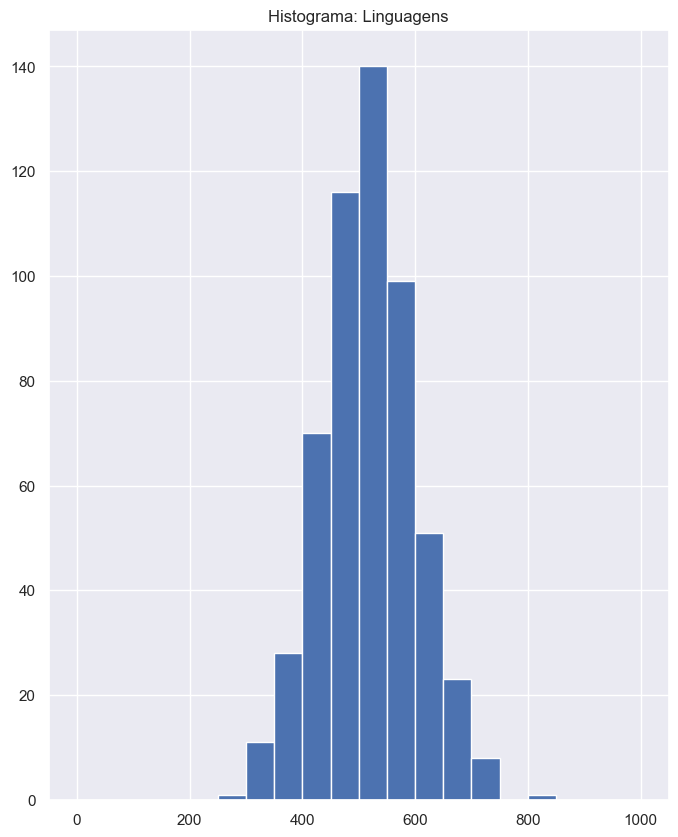

In [251]:
plt.rcParams['figure.figsize'] = [8, 10] ## Tamanho do gráfico de 8 por 10
sns.set_theme()

for column in histograma.select_dtypes(include=np.number).columns:
    plt.figure()
    plt.hist(histograma[column], bins=20, range=[0, 1000])  # Use o número desejado de bins
    plt.title("Histograma: " + column)


# # create distplots
# for column in histograma.select_dtypes(include=np.number).columns:
#     plt.figure()
#     sns.displot(data = histograma , x = column, kde= True, binwidth=20)
#     plt.title("Histograma: "+column)

Sim, ainda sim esta simetrico

8- Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers?Utilize o método IQR.

In [253]:
boxplot = data_enem[['Redação', 'Ciências da natureza']].copy()
boxplot

,Redação,Ciências da natureza
0,546.371706,390.482473
2,684.515750,443.183580
3,671.237114,413.979810
4,744.375048,609.758123
5,507.365147,497.777935
...,...,...
990,795.671459,557.957321
993,579.596477,528.010191
994,566.635561,554.934948
996,715.984249,542.028624


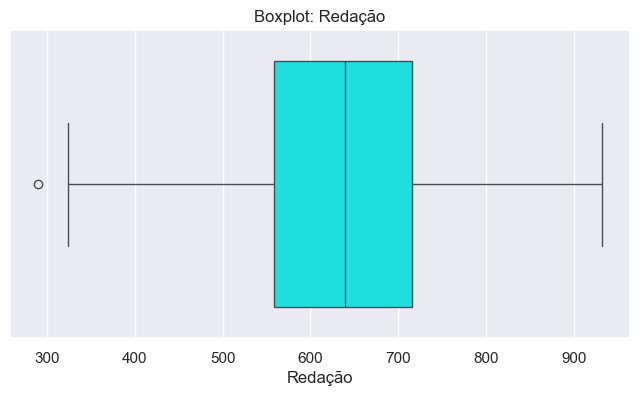

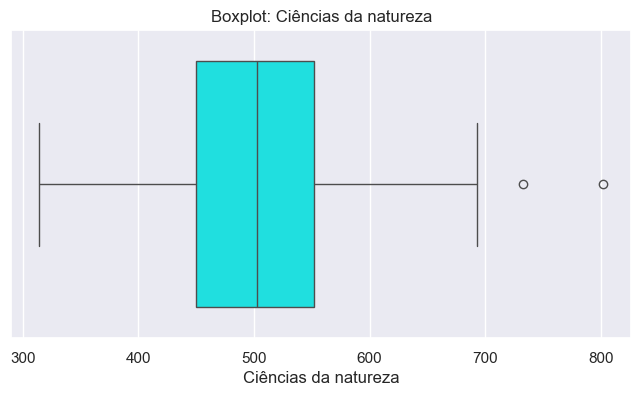

In [254]:
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()

### para cada uma das colunas numericas roda o boxplot
for column in boxplot.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(data = boxplot , x = column, color='cyan',showfliers=True)
    plt.title("Boxplot: "+column )

#### 2. Metodo do IQR :
O método IQR (distância inter-quartil em inglês) ve a distancia da amplitude dos quartis:

In [255]:
def find_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    # calcula  IQR
    iqr = q75 - q25
    # calcula outlier cutoff
    cut_off = iqr * 1.5
    # calcula margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    print(' IQR é ',iqr)
   # print('Valor minimo', lower)
   # print('Valor maximo', upper)
    outliers = []

    for i in dataset[colname].values:
      if((i > upper)or(i < lower)):
        outliers.append(i)
    print('O numero de outliers encontrado foi de', len(outliers))
    return lower, upper, outliers

 IQR é  157.02513490047488
O numero de outliers encontrado foi de 1
 IQR é  102.26240025932503
O numero de outliers encontrado foi de 2


<Figure size 1000x600 with 0 Axes>

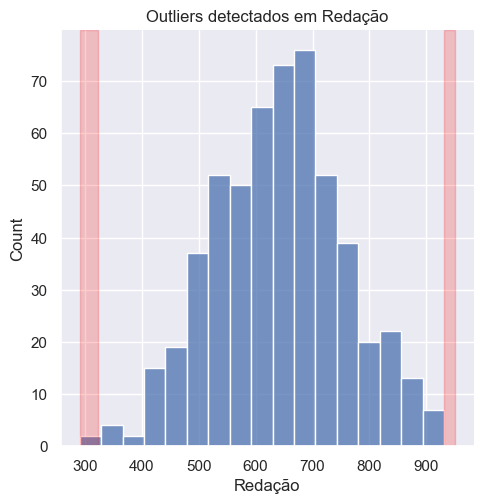

<Figure size 1000x600 with 0 Axes>

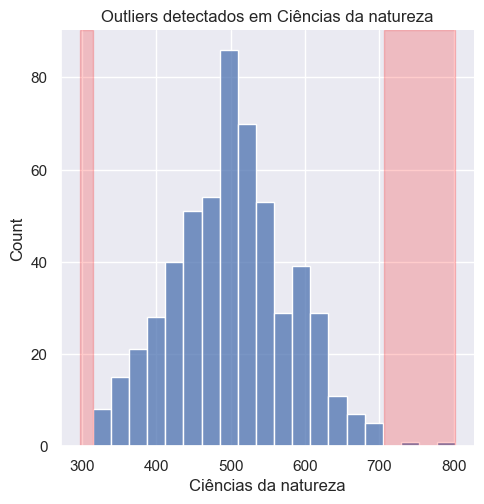

In [256]:
for column in boxplot.select_dtypes(include=np.number).columns:
  lower, upper, out =  find_outlier_iqr(boxplot, column)
  if (len(out) > 0):
    plt.figure(figsize = (10,6))
    sns.displot(boxplot[column], kde=False)
    plt.axvspan(xmin = lower,xmax= boxplot[column].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= boxplot[column].max(),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(column))

9- Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [273]:
boxplot = data_enem.copy()

In [274]:
def remove_outliers_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    # calcula  IQR
    iqr = q75 - q25
    # calcula outlier cutoff
    cut_off = iqr * 1.5
    # calcula margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    
    outliers = dataset[(dataset[colname] < lower) | (dataset[colname] > upper)][colname]
    
    print('IQR é', iqr)
    print('Valor mínimo', lower)
    print('Valor máximo', upper)
    print('O número de outliers encontrado foi de', len(outliers))
    
    # Remover outliers do dataset
    dataset_cleaned = dataset[(dataset[colname] >= lower) & (dataset[colname] <= upper)]
    
    return lower, upper, outliers, dataset_cleaned

In [275]:
media_antes = boxplot[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].mean()
media_antes

Linguagens              517.467162
Ciências humanas        528.351454
Ciências da natureza    502.142101
Matemática              537.172480
Redação                 641.193123
dtype: float64

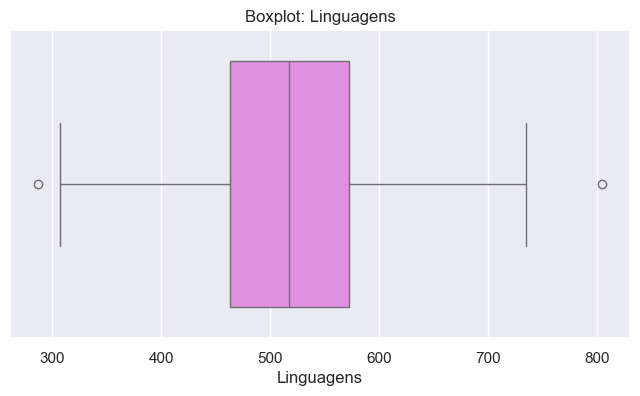

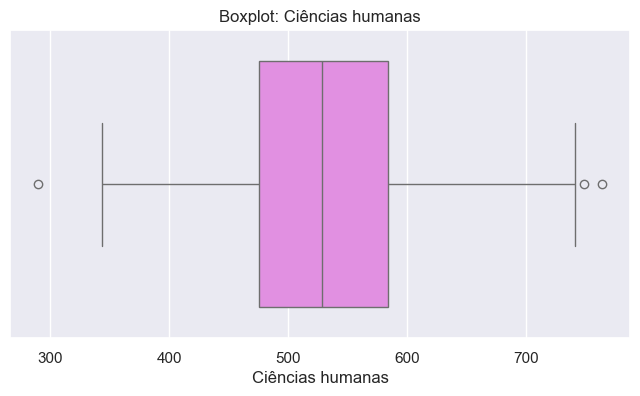

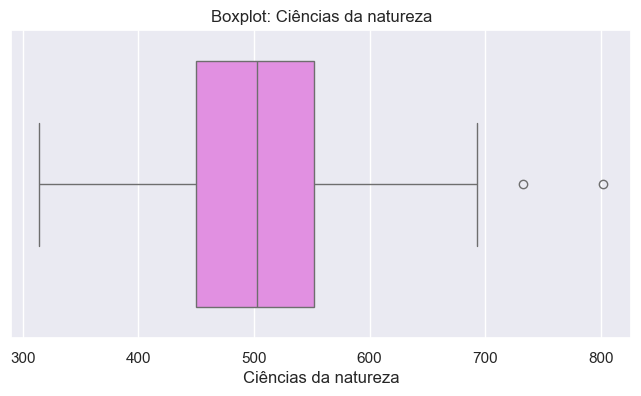

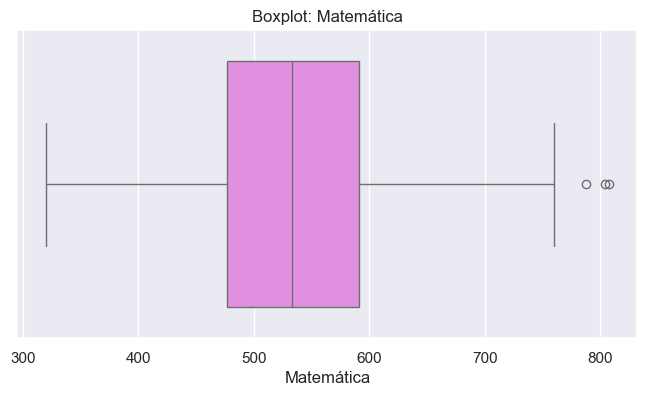

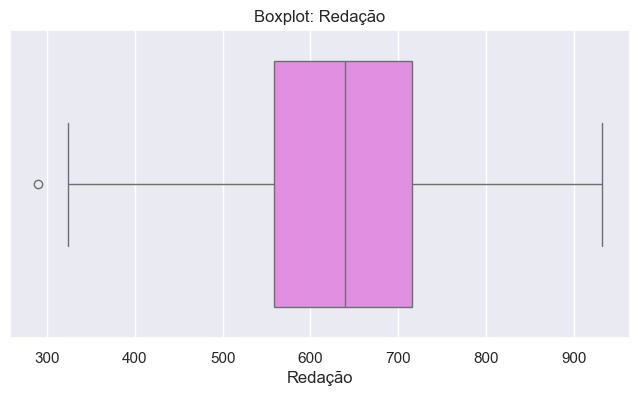

In [276]:
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()

### para cada uma das colunas numericas roda o boxplot
for column in boxplot.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(data = boxplot , x = column, color='violet',showfliers=True)
    plt.title("Boxplot: "+column)

In [277]:
# Para cada coluna numérica, remova outliers e salve o dataset limpo
# dataset_cleaned_list = []
# outliers_list = []

for column in boxplot.select_dtypes(include=np.number).columns:
    lower, upper, outliers, dataset_cleaned = remove_outliers_iqr(boxplot, column)
    # outliers_list.append(outliers)
    # dataset_cleaned_list.append(dataset_cleaned)

IQR é 109.99743934269998
Valor mínimo 297.65180891610004
Valor máximo 737.6415662868999
O número de outliers encontrado foi de 2
IQR é 108.25660959517495
Valor mínimo 313.4737071952626
Valor máximo 746.5001455759624
O número de outliers encontrado foi de 3
IQR é 102.26240025932503
Valor mínimo 296.6045346095625
Valor máximo 705.6541356468626
O número de outliers encontrado foi de 2
IQR é 114.31677633677492
Valor mínimo 305.5433065997877
Valor máximo 762.8104119468874
O número de outliers encontrado foi de 3
IQR é 157.02513490047488
Valor mínimo 322.98725564181274
Valor máximo 951.0877952437122
O número de outliers encontrado foi de 1


In [278]:
media_depois = dataset_cleaned[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].mean()
media_depois

Linguagens              517.399620
Ciências humanas        528.411815
Ciências da natureza    502.025033
Matemática              537.380554
Redação                 641.834594
dtype: float64

In [279]:
print("Médias antes da remoção de outliers:\n", media_antes)
print("\nMédias depois da remoção de outliers:\n", media_depois)

Médias antes da remoção de outliers:
 Linguagens              517.467162
Ciências humanas        528.351454
Ciências da natureza    502.142101
Matemática              537.172480
Redação                 641.193123
dtype: float64

Médias depois da remoção de outliers:
 Linguagens              517.399620
Ciências humanas        528.411815
Ciências da natureza    502.025033
Matemática              537.380554
Redação                 641.834594
dtype: float64


In [282]:
porcentagem = (media_antes - media_depois)*100 / media_antes
porcentagem

Linguagens              0.013052
Ciências humanas       -0.011424
Ciências da natureza    0.023314
Matemática             -0.038735
Redação                -0.100043
dtype: float64

A mudança que trouxe não foi dratica mudando no máximo 0.1%

10 - Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [305]:
data_enem_com_nulos.isna().sum()

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

In [306]:
data_enem_com_nulos.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [307]:
# Selecione apenas as colunas numéricas
data_enem_numericas = data_enem_com_nulos.select_dtypes(include=np.number)

# Preencha os valores nulos com as médias das colunas numéricas
data_enem_nulos_media = data_enem_numericas.fillna(data_enem_numericas.mean())

data_enem_nulos_media['média'] = data_enem_nulos_media.mean(axis=1)
data_enem_nulos_media.head(5)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,média
0,585.669300,686.512178,390.482473,452.281333,546.371706,532.263398
1,359.384608,642.084134,499.315583,412.205207,741.825256,530.962957
2,622.732384,495.510719,443.183580,669.683401,684.515750,583.125167
3,350.164605,602.041588,413.979810,676.608952,671.237114,542.806414
4,384.093657,489.249140,609.758123,520.426698,744.375048,549.580533


In [308]:
## Mediana
data_enem_nulos_mediana = data_enem_numericas.fillna(data_enem_numericas.median())

data_enem_nulos_mediana['média'] = data_enem_nulos_mediana.mean(axis=1)
data_enem_nulos_mediana.head(5)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,média
0,585.669300,686.512178,390.482473,452.281333,546.371706,532.263398
1,359.384608,642.084134,500.479263,412.205207,741.825256,531.195694
2,622.732384,495.510719,443.183580,669.683401,684.515750,583.125167
3,350.164605,602.041588,413.979810,676.608952,671.237114,542.806414
4,384.093657,489.249140,609.758123,520.426698,744.375048,549.580533


In [309]:
## Moda
data_enem_nulos_moda = data_enem_numericas.fillna(data_enem_numericas.mode())

data_enem_nulos_moda['média'] = data_enem_nulos_moda.mean(axis=1)
data_enem_nulos_moda.head(5)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,média
0,585.669300,686.512178,390.482473,452.281333,546.371706,532.263398
1,359.384608,642.084134,NaN,412.205207,741.825256,538.874801
2,622.732384,495.510719,443.183580,669.683401,684.515750,583.125167
3,350.164605,602.041588,413.979810,676.608952,671.237114,542.806414
4,384.093657,489.249140,609.758123,520.426698,744.375048,549.580533


In [310]:


media_geral_media = data_enem_nulos_media['média'].mean()
media_geral_mediana = data_enem_nulos_mediana['média'].mean()
media_geral_moda = data_enem_nulos_moda['média'].mean()

print('Média geral com a média: ', media_geral_media)
print('Média geral com a mediana: ', media_geral_mediana)
print('Média geral com a moda: ', media_geral_moda)

Média geral com a média:  542.9263730172955
Média geral com a mediana:  542.8341897941311
Média geral com a moda:  545.3585649989967


In [311]:
print('A que altera menos a media geral é a mediana com: ', media_geral_mediana)

A que altera menos a media geral é a mediana com:  542.8341897941311


In [312]:
desvio_padrao_media = data_enem_nulos_media['média'].std()
desvio_padrao_mediana = data_enem_nulos_mediana['média'].std()
desvio_padrao_moda = data_enem_nulos_moda['média'].std()

print('Desvio padrão com a média: ', desvio_padrao_media)
print('Desvio padrão com a mediana: ', desvio_padrao_mediana)
print('Desvio padrão com a moda: ', desvio_padrao_moda)

Desvio padrão com a média:  36.620962819469845
Desvio padrão com a mediana:  36.63072817508206
Desvio padrão com a moda:  42.22081423508201


In [313]:
print('A que altera menos o desvio padrão é a média com: ', desvio_padrao_media)

A que altera menos o desvio padrão é a média com:  36.620962819469845
